In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import pickle
import cv2
from os.path import isfile, join

#from spatial_transformer import SpatialTransformer
np.random.seed(123)  # for reproducibility

import matplotlib.pyplot as plt
%matplotlib inline

from scipy import misc
import glob
def load_train_HSV(img_path):
    imageArr = np.zeros((1, 32, 32, 3))
    iCount = 1
    print('total:',len(glob.glob(img_path)))
    for image_path in glob.glob(img_path):#("test/*.png"):
        img = cv2.imread( image_path )
        img = cv2.resize(img, (32, 32))
        #convert to gray
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        img = img.reshape(1,32,32,3)
        imageArr = np.concatenate((imageArr, img), axis=0)
        # print (image.shape)
        # print (image.dtype)
        #(32, 32, 3)   uint8
        if iCount%500 == 0:
            print ("500new loaded:",imageArr.shape)
        iCount += 1
        # print (imageArr.shape)
    print(imageArr.shape)
    imageArr = np.delete(imageArr, 0, axis=0)#imageArr[0], axis=0)
    print ("images imported: ",imageArr.shape)
    return imageArr

def load_train(img_path):
    imageArr = np.zeros((1, 32, 32, 3))
    iCount = 1
    print('total:',len(glob.glob(img_path)))
    for image_path in sorted(glob.glob(img_path), key=lambda name: int(name[6:-4])):#("test/*.png"):
        img = cv2.imread( image_path )
        img = cv2.resize(img, (32, 32))
        #convert to rgb
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.reshape(1,32,32,3)
        imageArr = np.concatenate((imageArr, img), axis=0)
        # print (image.shape)
        # print (image.dtype)
        #(32, 32, 3)   uint8
        if iCount%500 == 0:
            print ("500new loaded:",imageArr.shape,image_path)
        iCount += 1
        # print (imageArr.shape)
    print(imageArr.shape)
    imageArr = np.delete(imageArr, 0, axis=0)#imageArr[0], axis=0)
    print ("images imported: ",imageArr.shape)
    return imageArr

def load_test(img_path, start, end):
    imageArr = np.zeros((1, 32, 32, 3))
    iCount = 1
    print('total:',len(sorted(glob.glob(img_path), key=lambda name: int(name[5:-4]))))
    for image_path in sorted(glob.glob(img_path), key=lambda name: int(name[5:-4]))[start:end]:#("test/*.png"):
        img = cv2.imread( image_path )
        img = cv2.resize(img, (32, 32))
        #convert to rgb
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = img.reshape(1,32,32,3)
        imageArr = np.concatenate((imageArr, img), axis=0)
        # print (image.shape)
        # print (image.dtype)
        #(32, 32, 3)   uint8
        if iCount%500 == 0:
            print ("500new loaded:",imageArr.shape,image_path)
        iCount += 1
        # print (imageArr.shape)
    print(imageArr.shape)
    imageArr = np.delete(imageArr, 0, axis=0)#imageArr[0], axis=0)
    print ("images imported: ",imageArr.shape)
    return imageArr

def load_labels(file_path):
    mnist_df = pd.read_csv(file_path, index_col=None)
    print('train label sizes:', mnist_df.shape)
    #labels = mnist_df.iloc[0:mnist_df.shape[0],0:1]
    labels = mnist_df.iloc[0:mnist_df.shape[0],1:2]
    labels_data = labels.values
    print('labels:',labels.shape, labels.shape[-1])
    print('labels sample:',labels_data[:10])
    return labels_data

In [2]:
def cache_data(data, path):
    if os.path.isdir(os.path.dirname(path)):
        file = open(path, 'wb')
        pickle.dump(data, file)
        file.close()
    else:
        print('Directory doesnt exists')

def restore_data(path):
    data = dict()
    if os.path.isfile(path):
        file = open(path, 'rb')
        data = pickle.load(file)
    return data

In [ ]:
cache_path = os.path.join('cache', 'train.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_train = load_train('train/*.png')
    y_train = load_labels('trainLabels.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print("cache data:",X_train.shape, y_train.shape, "y sample:", y_train[:10])
    print(y_train)
    cache_data((X_train, y_train), cache_path)
    print("cache_data")
else:
    print('Restore train from cache!')
    (X_train, y_train) = restore_data(cache_path)
    print(X_train.shape, y_train.shape, "y sample:", y_train[:5])

In [ ]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2])        
for i in range(0, 4):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i])
    plt.title(y_train[i])   

In [17]:
testa = [0,1,2]
testb = [3]
testc = [4]

testa = np.concatenate((testa, testb), axis=0)
testa = np.concatenate((testa, testc), axis=0)

print(testa)

[0 1 2 3 4]


In [ ]:
cache_path = os.path.join('cache', 'trainHSV.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_train = load_train_HSV('train/*.png')
    y_train = load_labels('trainLabels.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print("cache data:",X_train.shape, y_train.shape, "y sample:", y_train[:10])
    print(y_train)
    cache_data((X_train, y_train), cache_path)
    print("cache_data")
else:
    print('Restore train from cache!')
    (X_train, y_train) = restore_data(cache_path)
    print(X_train.shape, y_train.shape, "y sample:", y_train[:5])

total: 50000
500new loaded: (501, 32, 32, 3)
500new loaded: (1001, 32, 32, 3)
500new loaded: (1501, 32, 32, 3)
500new loaded: (2001, 32, 32, 3)
500new loaded: (2501, 32, 32, 3)
500new loaded: (3001, 32, 32, 3)
500new loaded: (3501, 32, 32, 3)
500new loaded: (4001, 32, 32, 3)
500new loaded: (4501, 32, 32, 3)
500new loaded: (5001, 32, 32, 3)
500new loaded: (5501, 32, 32, 3)
500new loaded: (6001, 32, 32, 3)
500new loaded: (6501, 32, 32, 3)
500new loaded: (7001, 32, 32, 3)
500new loaded: (7501, 32, 32, 3)
500new loaded: (8001, 32, 32, 3)
500new loaded: (8501, 32, 32, 3)
500new loaded: (9001, 32, 32, 3)
500new loaded: (9501, 32, 32, 3)
500new loaded: (10001, 32, 32, 3)
500new loaded: (10501, 32, 32, 3)
500new loaded: (11001, 32, 32, 3)
500new loaded: (11501, 32, 32, 3)
500new loaded: (12001, 32, 32, 3)
500new loaded: (12501, 32, 32, 3)
500new loaded: (13001, 32, 32, 3)
500new loaded: (13501, 32, 32, 3)
500new loaded: (14001, 32, 32, 3)
500new loaded: (14501, 32, 32, 3)
500new loaded: (15001

total: 300000
(11, 32, 32, 3)
images imported:  (10, 32, 32, 3)


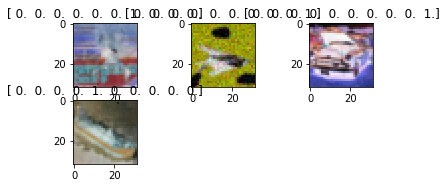

In [32]:
# X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2]) 
X_test = load_test('test/*.png', 0, 10)
for i in range(0, 4):
    plt.subplot(330 + (i+1))
    plt.imshow(X_test[i])
    plt.title(y_train[i])  

In [39]:
cache_path = os.path.join('cache', 'test0-50.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 0, 50000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(50000, 32, 32, 3)


In [33]:
cache_path = os.path.join('cache', 'test50-80.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 50000, 80000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [42]:
cache_path = os.path.join('cache', 'test80-110.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 80000, 110000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [46]:
cache_path = os.path.join('cache', 'test110-140.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 110000, 140000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [49]:
cache_path = os.path.join('cache', 'test140-170.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 140000, 170000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [52]:
cache_path = os.path.join('cache', 'test170-200.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 170000, 200000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [55]:
cache_path = os.path.join('cache', 'test200-230.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 200000, 230000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(30000, 32, 32, 3)


In [58]:
cache_path = os.path.join('cache', 'test250-300.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 250000, 300000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(50000, 32, 32, 3)


In [61]:
cache_path = os.path.join('cache', 'test230-250.dat')
if not os.path.isfile(cache_path):
    # train_data, train_target = load_train()
    X_test = load_test('test/*.png', 230000, 250000)#load_train('test/*.png')
    #y_test = load_labels('train.csv')
    #X_train, y_train = load_train_dic('onlyletter/')
    # load_train('trimeddataset/g1')
    print(X_test.shape)
    cache_data(X_test, cache_path)
    print("cache_data for test")
else:
    print('Restore test from cache!')
    X_test = restore_data(cache_path)
    print(X_test.shape)

Restore test from cache!
(20000, 32, 32, 3)


In [16]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

#save the uncoded labels
labels_data = y_train
# encode class values as integers
y_train = np.ravel(y_train)
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
# print(encoded_Y.shape, encoded_Y) 
# [0,1,2,3...,34,35]
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# print(dummy_y.shape, dummy_y)
# [1,0,0....0][0,1,0....,0][0,0,1,...,0]

y_train = dummy_y
print("y shape:",y_train.shape,"y sample:",y_train[:10])

Using TensorFlow backend.


y shape: (50000, 10) y sample: [[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]]


In [17]:
input_shape = (32,32,3)
batch_size = 64
num_classes = 10
epochs = 400
data_augmentation = True

# for i in range(5, 9):
#     plt.subplot(330 + (i+1))
#     plt.imshow(imgTrain[i], cmap=plt.get_cmap('gray'))
#     plt.title(labels_data[i])

In [28]:
from keras.callbacks import EarlyStopping,CSVLogger,ModelCheckpoint, TensorBoard
from time import time
from datetime import datetime

# optimizers = ['adam','rmsprop']
# activations = ['relu','PReLU','LeakyReLU']
# activations_ps = ['relu']
# dropouts = [0.6,0.5,0,0.3]
# # padding = ['same','valid']
# cost_fun = [loss_max,'mse']

# checkpoint (only weights here)
filepath="backups/weights.best.hdf5"#"backups/weights-improvement-{epoch:02d}-{loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

earlystopping = EarlyStopping(monitor='loss',patience=2,verbose=1)

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
tensorboard = TensorBoard("logs/run_a")

callbacks = [earlystopping, checkpoint, tensorboard]

# use following code before model.compile to load saved weights
# load weights
# model.load_weights("weights.best.hdf5")

# run this in a seperate terminial 
# tensorboard --logdir=logs/

In [ ]:
from keras.datasets import cifar10

(x_trainK, y_trainK), (x_testK, y_testK) = cifar10.load_data()
# x_trainK = x_trainK.reshape(x_trainK.shape[0], x_trainK.shape[1], x_trainK.shape[2], 3)
# x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
# y_train = y_train.reshape(y_train.shape[0], 1)
# y_test = y_test.reshape(y_test.shape[0], 1)
y_trainK = keras.utils.to_categorical(y_trainK, num_classes)
y_testK = keras.utils.to_categorical(y_testK, num_classes)
print (x_trainK.shape, y_trainK.shape, x_testK.shape, y_testK.shape)
print ("y samples:", y_testK[:10])
x_trainK = np.concatenate((x_testK, x_trainK), axis=0)
y_trainK = np.concatenate((y_testK, y_trainK), axis=0)
# X_train = np.concatenate((x_trainK, X_train), axis=0)
# X_train = np.concatenate((x_testK, X_train), axis=0)
# y_train = np.concatenate((y_trainK, y_train), axis=0)
# y_train = np.concatenate((y_testK, y_train), axis=0)

#np.random.shuffle(images_data)


In [ ]:
print("k samples:",x_trainK[:5])
print("train samples:",X_train[:5])

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Lambda, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import keras

def selu(x):
    import tensorflow as tf
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale*tf.where(x >= 0.0, x, alpha*tf.nn.elu(x))

# initial weights
# b = np.zeros((2, 3), dtype='float32')
# b[0, 0] = 1
# b[1, 1] = 1
# W = np.zeros((50, 6), dtype='float32')
# weights = [W, b.flatten()]

# locnet = Sequential()
# locnet.add(MaxPooling2D(pool_size=(2,2), input_shape=input_shape))
# locnet.add(Conv2D(20, (5, 5)))
# locnet.add(MaxPooling2D(pool_size=(2,2)))
# locnet.add(Conv2D(20, (5, 5)))

# locnet.add(Flatten())
# locnet.add(Dense(50))
# locnet.add(Activation('relu'))
# locnet.add(Dense(6, weights=weights))
#locnet.add(Activation('sigmoid'))

In [22]:
def norm_input(x):
    mean = X_train.mean().astype(np.float32)
    std = X_train.std().astype(np.float32)
    return (x - mean) / std

In [23]:
def my_deeper_cnn_model():
    model = Sequential()
    #model.add(SpatialTransformer(localization_net=locnet, output_size=(30, 30), input_shape=input_shape))
    #model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28)))
    
    model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
    model.add(Activation('selu'))
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('selu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('selu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(BatchNormalization()) # customized 
    model.add(Dense(512))
    model.add(Activation('selu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    
#     #customized op
#     from keras import optimizers
#     ad10e4 = optimizers.Adam(lr=0.0005)
#     #commpile modelPython
#     model.compile(optimizer=ad10e4,
#                   loss='binary_crossentropy',
#                   metrics=['accuracy'])

    # initiate RMSprop optimizer
    opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

    # Let's train the model using RMSprop
    model.compile(loss='categorical_crossentropy',
                  optimizer=opt,
                  metrics=['accuracy'])

    return model

In [24]:
X_train = X_train.astype('float32')
# X_test = X_test.astype('float32')
X_train /= 255
#X_test /= 255
print("train sample:",X_train[:5])#,"test sample",x_test[:5])
# from keras.utils import np_utils
# from sklearn.preprocessing import LabelEncoder

# #save the uncoded labels
# labels_data = y_train
# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y_train)
# encoded_Y = encoder.transform(y_train)
# # print(encoded_Y.shape, encoded_Y) 
# # [0,1,2,3...,34,35]
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)
# # print(dummy_y.shape, dummy_y)
# # [1,0,0....0][0,1,0....,0][0,0,1,...,0]

# y_train = dummy_y
# print(y_train.shape)

train sample: [[[[ 0.23137255  0.24313726  0.24705882]
   [ 0.16862746  0.18039216  0.17647059]
   [ 0.19607843  0.1882353   0.16862746]
   ..., 
   [ 0.61960787  0.51764709  0.42352942]
   [ 0.59607846  0.49019608  0.40000001]
   [ 0.58039218  0.48627451  0.40392157]]

  [[ 0.0627451   0.07843138  0.07843138]
   [ 0.          0.          0.        ]
   [ 0.07058824  0.03137255  0.        ]
   ..., 
   [ 0.48235294  0.34509805  0.21568628]
   [ 0.46666667  0.32549021  0.19607843]
   [ 0.47843137  0.34117648  0.22352941]]

  [[ 0.09803922  0.09411765  0.08235294]
   [ 0.0627451   0.02745098  0.        ]
   [ 0.19215687  0.10588235  0.03137255]
   ..., 
   [ 0.4627451   0.32941177  0.19607843]
   [ 0.47058824  0.32941177  0.19607843]
   [ 0.42745098  0.28627452  0.16470589]]

  ..., 
  [[ 0.81568629  0.66666669  0.3764706 ]
   [ 0.78823531  0.60000002  0.13333334]
   [ 0.7764706   0.63137257  0.10196079]
   ..., 
   [ 0.627451    0.52156866  0.27450982]
   [ 0.21960784  0.12156863  0.027

In [29]:
model = my_deeper_cnn_model()

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_split=0.01,
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(X_train)

    # Fit the model on the batches generated by datagen.flow().
    model.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=X_train.shape[0] // batch_size,
                        epochs=epochs, callbacks=callbacks)#,validation_data=(X_test, y_test))








#Fit keras Model
# model.fit(X_train, Y_train,
#           batch_size=256, epochs=30, verbose=1, callbacks=callbacks,validation_data=(X_test,Y_test)) #instead of 15epoch
#model.fit(images_data, labels_data,
#          batch_size=256, epochs=18, verbose=1, validation_split=0.0001) #instead of 15epoch
# callbacks=callbacks,
# Epoch 1/10
# 7744/60000 [==>...........................] - ETA: 96s - loss: 0.5806 - acc: 0.8164

#score = model.evaluate(X_test, Y_test, verbose=0)
#print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))
print('debuging')
#
# from keras.models import model_from_json
#
# # split into input (X) and output (Y) variables
# # X = dataset[:,0:8]
# # Y = dataset[:,8]
# # # create model
# # model = Sequential()
# # model.add(Dense(12, input_dim=8, kernel_initializer='uniform', activation='relu'))
# # model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
# # model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
# # # Compile model
# # model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# # # Fit the model
# # model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# # # evaluate the model
# # scores = model.evaluate(X, Y, verbose=0)
# # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
#
# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model.h5")
# print("Saved model to disk")
#
# # later...
#
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("model.h5")
# print("Loaded model from disk")
#
# # evaluate loaded model on test data
# loaded_model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# score = loaded_model.evaluate(X_test, Y_test, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

# from keras.models import load_model
#
# model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
# #del model  # deletes the existing model
#
# # returns a compiled model
# # identical to the previous one
# model_L = load_model('my_model.h5')
# model_L.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# score = model_L.evaluate(X_test, Y_test, verbose=0)
# print("%s: %.2f%%" % (model_L.metrics_names[1], score[1]*100))


Using real-time data augmentation.
Epoch 1/400
781/781 [==============================] - 397s - loss: 2.6508 - acc: 0.2918   
Epoch 2/400
781/781 [==============================] - 386s - loss: 2.0387 - acc: 0.3822   
Epoch 3/400
781/781 [==============================] - 404s - loss: 1.8250 - acc: 0.4197   
Epoch 4/400
781/781 [==============================] - 432s - loss: 1.6564 - acc: 0.4587   
Epoch 5/400
781/781 [==============================] - 401s - loss: 1.5350 - acc: 0.4874   
Epoch 6/400
781/781 [==============================] - 398s - loss: 1.4428 - acc: 0.5133   
Epoch 7/400
781/781 [==============================] - 397s - loss: 1.3713 - acc: 0.5292   
Epoch 8/400
781/781 [==============================] - 384s - loss: 1.3235 - acc: 0.5419   
Epoch 9/400
781/781 [==============================] - 391s - loss: 1.2672 - acc: 0.5597   
Epoch 10/400
781/781 [==============================] - 392s - loss: 1.2189 - acc: 0.5728   
Epoch 11/400
781/781 [======================

781/781 [==============================] - 351s - loss: 0.7531 - acc: 0.7388   
Epoch 64/400
781/781 [==============================] - 886s - loss: 0.7513 - acc: 0.7363   
Epoch 65/400
781/781 [==============================] - 1103s - loss: 0.7500 - acc: 0.7393  
Epoch 66/400
781/781 [==============================] - 1045s - loss: 0.7483 - acc: 0.7395  
Epoch 67/400
781/781 [==============================] - 1101s - loss: 0.7446 - acc: 0.7391  
Epoch 68/400
781/781 [==============================] - 621s - loss: 0.7444 - acc: 0.7403   
Epoch 69/400
781/781 [==============================] - 349s - loss: 0.7372 - acc: 0.7444   
Epoch 70/400
781/781 [==============================] - 355s - loss: 0.7385 - acc: 0.7427   
Epoch 71/400
781/781 [==============================] - 360s - loss: 0.7332 - acc: 0.7454   
Epoch 72/400
781/781 [==============================] - 356s - loss: 0.7320 - acc: 0.7440   
Epoch 73/400
781/781 [==============================] - 359s - loss: 0.7304 - acc: 

In [62]:
X_test = X_test.astype('float32')
X_test /= 255
print("test sample:",X_test[:5])

test sample: [[[[ 0.24313726  0.23137255  0.27843139]
   [ 0.47450981  0.47843137  0.45882353]
   [ 0.49803922  0.52156866  0.43921569]
   ..., 
   [ 0.32941177  0.30588236  0.31764707]
   [ 0.32941177  0.29803923  0.31764707]
   [ 0.30980393  0.27450982  0.30588236]]

  [[ 0.25490198  0.23529412  0.28235295]
   [ 0.50588238  0.51764709  0.47843137]
   [ 0.48627451  0.52156866  0.41568628]
   ..., 
   [ 0.5411765   0.50980395  0.52941179]
   [ 0.52549022  0.48627451  0.50980395]
   [ 0.49411765  0.45490196  0.48627451]]

  [[ 0.24705882  0.23137255  0.27843139]
   [ 0.53725493  0.5529412   0.49803922]
   [ 0.48235294  0.52156866  0.40784314]
   ..., 
   [ 0.41568628  0.3764706   0.40784314]
   [ 0.42745098  0.38431373  0.41568628]
   [ 0.43137255  0.3882353   0.41960785]]

  ..., 
  [[ 0.6156863   0.66666669  0.52941179]
   [ 0.6901961   0.74901962  0.60000002]
   [ 0.78039217  0.83529413  0.67450982]
   ..., 
   [ 0.24705882  0.26274511  0.28627452]
   [ 0.30980393  0.32156864  0.3529

In [63]:
# rst = model_L.predict_classes(images_datats, verbose=0)
# print(rst.shape)

rst = model.predict_classes(X_test, verbose=1)
print(rst.shape)
rststr = encoder.inverse_transform(rst)
rst_df = pd.DataFrame({"id": list(range(230001,230000+len(rst)+1)),
                         "label": rststr})
rst_df.to_csv('rstpreditct0806_230_250.csv', index=False, header=True)

20000/20000 [==============================] - 46s    
(20000,)


In [ ]:
print(len(rststr))
print(len(list(range(50001,50000+len(rst)+1))))
print(list(range(50001,50001+len(rst)+1)))

In [ ]:
from keras.models import load_model

model.save_weights("model.h5")
print("Saved model to disk")

# del model  # deletes the existing model

model_L = load_model('my_model.h5')
model_L.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
score = model_L.evaluate(X_test, Y_test, verbose=0)
print("%s: %.2f%%" % (model_L.metrics_names[1], score[1]*100))

In [ ]:
# use pretrained model

from keras.models import *
from keras.layers import *
from keras.applications import *
from keras.preprocessing.image import *
import h5py
def write_gap(MODEL, image_size, lambda_func=None):
    width = image_size[0]
    height = image_size[1]
    input_tensor = Input((height, width, 3))
    x = input_tensor
    if lambda_func:
        x = Lambda(lambda_func)(x)
    
    base_model = MODEL(input_tensor=x, weights='imagenet', include_top=False)
    model = Model(base_model.input, GlobalAveragePooling2D()(base_model.output))
    gen = ImageDataGenerator()
    train_generator = gen.flow_from_directory("train2", image_size, shuffle=False, 
                                              batch_size=16)
    test_generator = gen.flow_from_directory("test2", image_size, shuffle=False, 
                                             batch_size=16, class_mode=None)
    train = model.predict_generator(train_generator, train_generator.nb_sample)
    test = model.predict_generator(test_generator, test_generator.nb_sample)
    with h5py.File("gap_%s.h5"%MODEL.func_name) as h:
        h.create_dataset("train", data=train)
        h.create_dataset("test", data=test)
        h.create_dataset("label", data=train_generator.classes)
write_gap(ResNet50, (224, 224))
write_gap(InceptionV3, (299, 299), inception_v3.preprocess_input)
write_gap(Xception, (299, 299), xception.preprocess_input)

import h5py
import numpy as np
from sklearn.utils import shuffle
np.random.seed(2017)
X_train = []
X_test = []
for filename in ["gap_ResNet50.h5", "gap_Xception.h5", "gap_InceptionV3.h5"]:
    with h5py.File(filename, 'r') as h:
        X_train.append(np.array(h['train']))
        X_test.append(np.array(h['test']))
        y_train = np.array(h['label'])
X_train = np.concatenate(X_train, axis=1)
X_test = np.concatenate(X_test, axis=1)
X_train, y_train = shuffle(X_train, y_train)

from keras.models import *
from keras.layers import *
np.random.seed(2017)
input_tensor = Input(X_train.shape[1:])
x = Dropout(0.5)(input_tensor)
x = Dense(1, activation='sigmoid')(x)
model = Model(input_tensor, x)
model.compile(optimizer='adadelta',
              loss='binary_crossentropy',
              metrics=['accuracy'])

digraph G{
    node [shape=record]
    a[label="ResNet50|{input:|output:}|{(224, 224, 3)|(2048)}"]
    b[label="InceptionV3|{input:|output:}|{(299, 299, 3)|(2048)}"]
    c[label="Xception|{input:|output:}|{(299, 299, 3)|(2048)}"]
    Merge[label="Merge|{input:|output:}|{(3, 2048)|(6144)}"]
    Dropout[label="Dropout|Rate:|0.5"]
    Output[label="Output|{input:|output:}|{(6144)|(1)}"]
    Image -> a -> Merge
    Image -> b -> Merge
    Image -> c -> Merge
    Merge -> Dropout -> Output
}

model.fit(X_train, y_train, batch_size=128, nb_epoch=8, validation_split=0.2)

rst = model.predict_classes(X_test, verbose=1)
print(rst.shape)
rststr = encoder.inverse_transform(rst)
rst_df = pd.DataFrame({"id": list(range(1,len(rst)+1)),
                         "label": rststr})
rst_df.to_csv('rstpreditct0723ooo.csv', index=False, header=True)